[](attachment:dm_test.png)
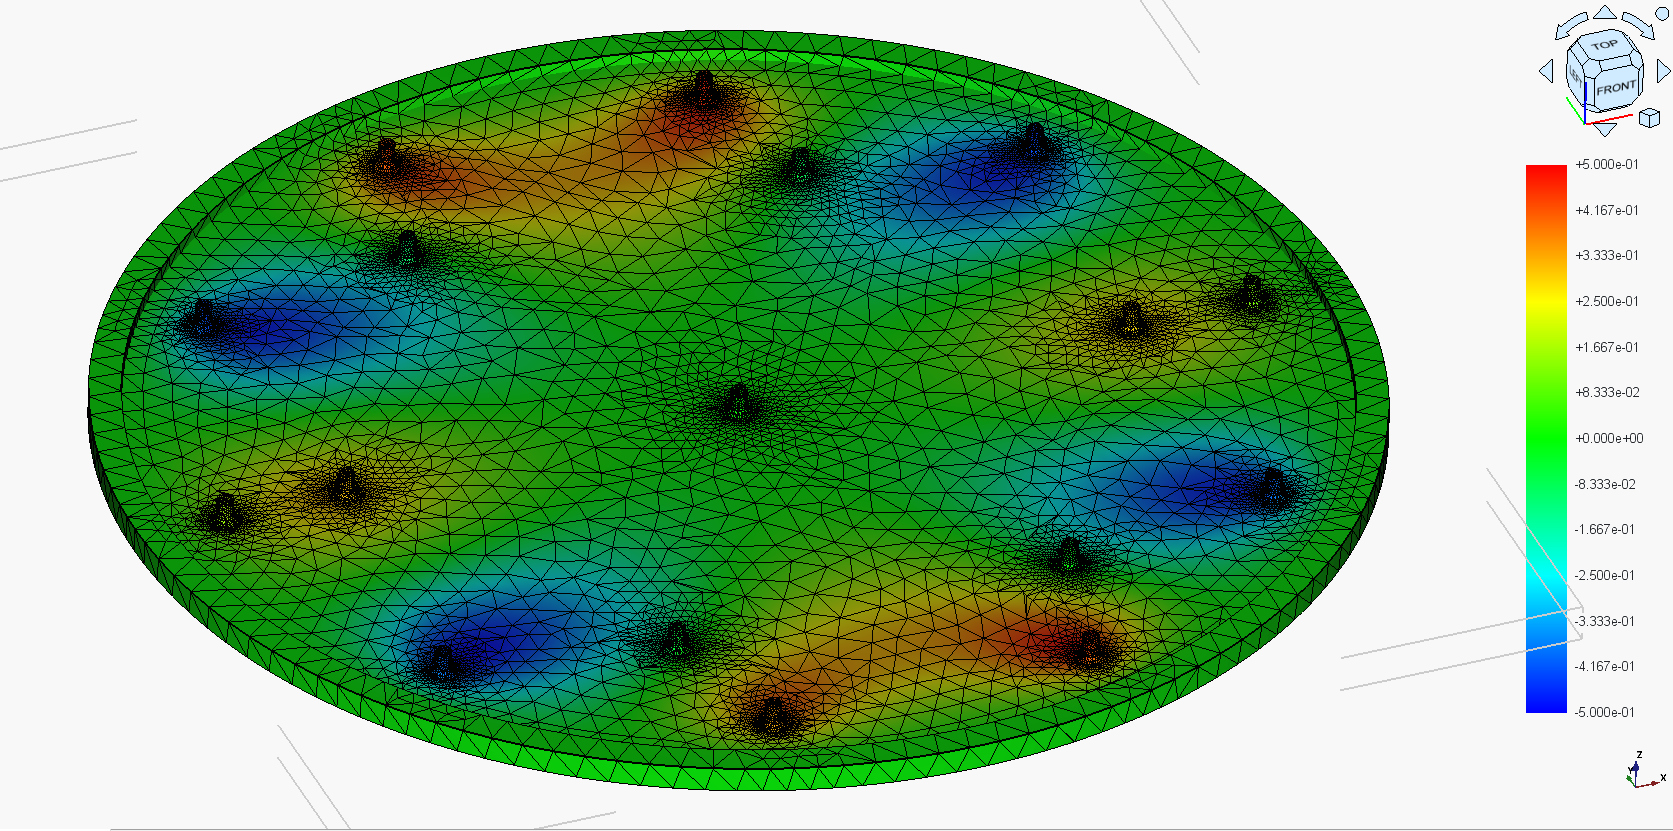


## Deformable Mirror Approximation of Zernike Modes


This notebook presents the results of a finite element method (FEM) analysis of a deformable mirror (DM) and evaluates its accuracy in reproducing a target set of Zernike modes over the clear aperture.

---

### Density Maps of Surface Deformation

**Two-dimensional density maps** are used to visualize the surface deformation across the Clear Aperture.

For each Zernike mode, the following maps are shown:

- Target Zernike surface deformation
- Deformable mirror approximation


### RMS Residual Error per Zernike Mode

The bar plot shown in this section reports the **root-mean-square (RMS) residual error** between each target Zernike mode and its corresponding DM approximation.


The RMS values are expressed in **nanometers** and provide a compact metric of the DM’s ability to reproduce each Zernike mode.  
Lower RMS values indicate better modal reproduction, while higher values highlight modes that are more challenging due to actuator spacing, influence functions, or spatial frequency limitations.

---




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import Normalize
from scipy.interpolate import griddata
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

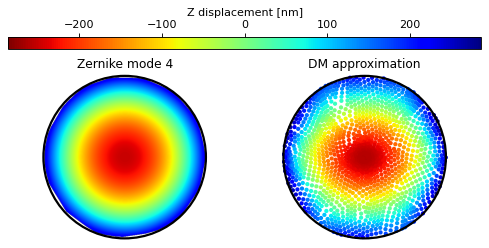

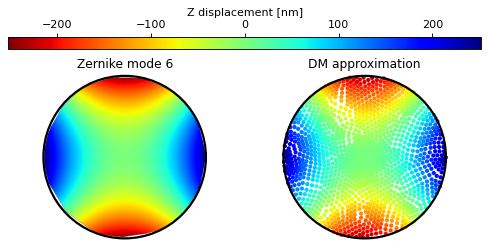

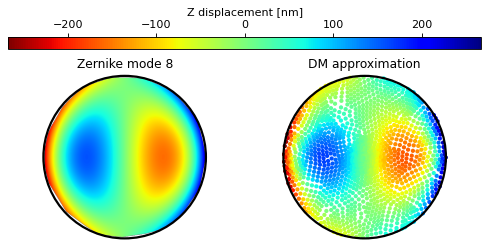

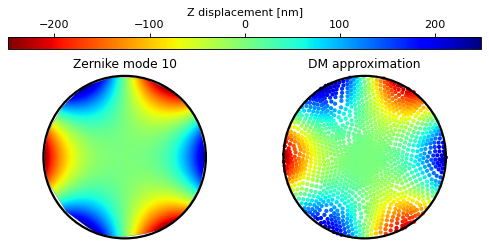

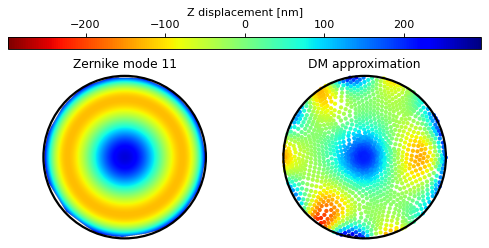

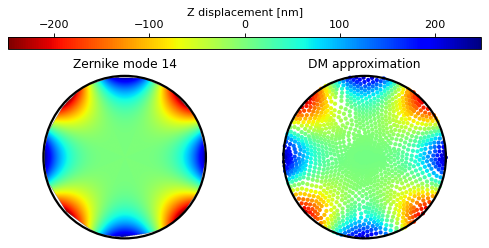

In [25]:

# Define simulated data modes (Noll)
modes_noll = [4,6,8,10,11,14]


for mode in modes_noll:
   
    # update path to your own directory
    filename = f'C:\\nodes_displacements_{mode}.csv'  

    data = pd.read_csv(filename, header=None)
    x = data[0].values
    y = data[1].values
    z = data[2].values * 1e6      # Zernike target mode
    dz = data[3].values * 1e6     # DM Approximation

    
    # Normalize x and y to the unit disk
    radii = np.sqrt(x**2 + y**2)
    x_norm = x / np.max(radii)
    y_norm = y / np.max(radii)

    # Mask points outside the unit disk
    mask = (x_norm**2 + y_norm**2) <= 1.0
    x_plot = x_norm[mask]
    y_plot = y_norm[mask]
    z_plot = z[mask]
    dz_plot = dz[mask]
    
    N = 500
    xi = np.linspace(-1.02, 1.02, N)
    yi = np.linspace(-1.02, 1.02, N)
    Xi, Yi = np.meshgrid(xi, yi)

    # Interpolate target Zernike mode only
    Zi = griddata( (x_plot, y_plot), z_plot, (Xi, Yi), method='cubic' )

    # Mask outside unit disk
    Ri = np.sqrt(Xi**2 + Yi**2)
    Zi[Ri >= 1.0] = np.nan



    # Shared color normalization
    absmax = max(np.abs(z_plot).max(), np.abs(dz_plot).max())
    norm = Normalize(vmin=-absmax, vmax=absmax)
    
    
    # Create figure with two columns
    fig, axes = plt.subplots(
        nrows=1, ncols=2,
        figsize=(6, 3),
        dpi=80,
        constrained_layout=True
    )
    

    cmap = 'jet_r'

    # Left: Zernike mode    
    sc1 = axes[0].imshow(
    Zi,
    extent=(-1.02, 1.02, -1.02, 1.02),
    origin='lower',
    cmap=cmap,
    norm=norm
    )

    
    # Right: DM Approximation
    sc2 = axes[1].scatter(
        x_plot, y_plot,
        c=dz_plot,
        cmap=cmap,
        norm=norm,
        s=14.5,
        edgecolor='none'
    )



    axes[0].set_title(f"Zernike mode {mode}", fontsize=11)
    axes[1].set_title("DM approximation", fontsize=11)


    for ax in axes:
        ax.set_xlim(-1.02, 1.02)
        ax.set_ylim(-1.02, 1.02)
        ax.set_aspect('equal', adjustable='box')
        ax.axis('off')
        ax.add_patch(
            Circle((0, 0), 1, edgecolor='black', facecolor='none', linewidth=2)
        )


    cbar = fig.colorbar(
        sc1,
        ax=axes,
        orientation='horizontal',
        location='top',
        pad=0.05,
        aspect=40
    )
    cbar.set_label('Z displacement [nm]')

    plt.show()
    plt.close()
    
    


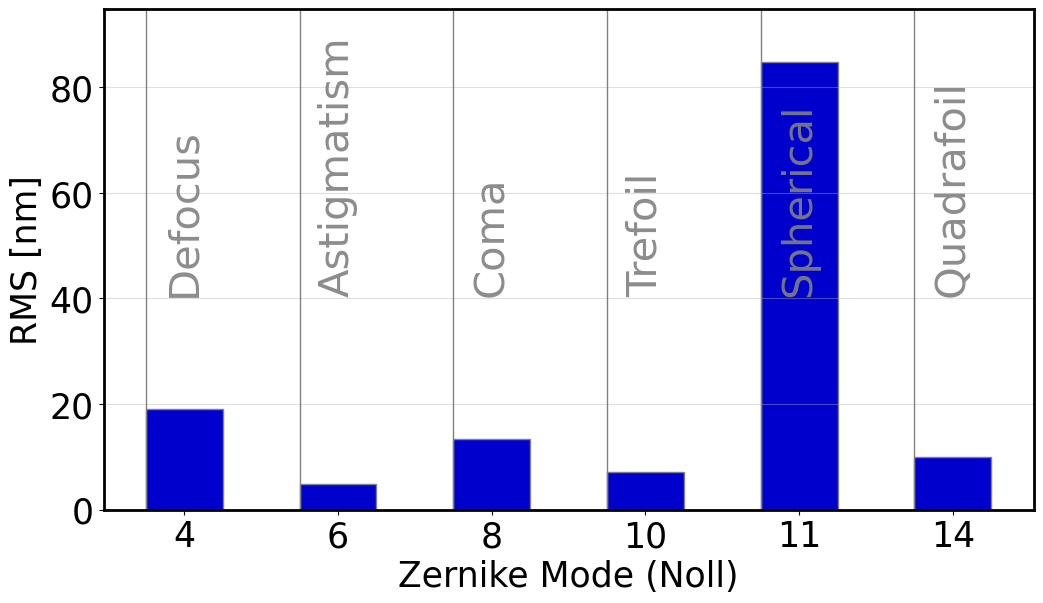

In [24]:
# -----------------------------
# Zernike modes in files
# -----------------------------

modes_noll = [4, 6, 8, 10, 11, 14]

vertical_labels = [
    "Defocus",
    "Astigmatism",
    "Coma",
    "Trefoil",
    "Spherical",
    "Quadrafoil",
]

rms_values = []




# -----------------------------
# Read files & compute RMS
# -----------------------------
for mode in modes_noll:
    
    
    # update path to your own directory
    filename = f'C:\\nodes_displacements_{mode}.csv'
    df = pd.read_csv(filename, header=None)


    z  = df.iloc[:, 2].values
    dz = df.iloc[:, 3].values


    # RMS of residual (→ nm)
    rms = np.sqrt(np.mean((z - dz)**2)) * 1e6
    rms_values.append(rms)

    
    
    
    
rms_values = np.array(rms_values)


plt.figure(figsize=(12, 6.5))

x = np.arange(len(modes_noll))
width = 0.5

plt.bar(x, rms_values, width=width,
        color="mediumblue", edgecolor="gray")

plt.xlabel("Zernike Mode (Noll)", fontsize=25)
plt.ylabel("RMS [nm]", fontsize=25)

plt.xticks(x, modes_noll)
plt.tick_params(axis="both", labelsize=25)

plt.ylim(0, rms_values.max() + 10)
plt.grid(axis="y", linestyle="-", alpha=0.4)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)

for i in range(len(modes_noll)):
    plt.axvline(x=i - width / 2, color="grey", linewidth=1)

for i, label in enumerate(vertical_labels):
    plt.text(
        x[i],
        rms_values.max() /2.1,
        label,
        ha="center",
        va="bottom",
        rotation="vertical",
        fontsize=30,
        color="gray",
        alpha=0.9,
    )

plt.show()


